In [0]:

import pandas as pd
import numpy as np

In [3]:

df = pd.read_csv('NSE.csv')


print(df.head())
print('\n Shape of the data:')
print(df.shape)

         Date    Open    High  ...   Close  Total Trade Quantity  Turnover (Lacs)
0  2018-10-08  208.00  222.25  ...  215.15             4642146.0         10062.83
1  2018-10-05  217.00  218.60  ...  209.20             3519515.0          7407.06
2  2018-10-04  223.50  227.80  ...  218.20             1728786.0          3815.79
3  2018-10-03  230.00  237.50  ...  227.60             1708590.0          3960.27
4  2018-10-01  234.55  234.60  ...  230.90             1534749.0          3486.05

[5 rows x 8 columns]

 Shape of the data:
(1235, 8)


In [0]:

df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']


data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

In [5]:
for i in range(0,len(data)):
     new_data['Date'][i] = data['Date'][i]
     new_data['Close'][i] = data['Close'][i]




train = new_data[:987]
valid = new_data[987:]


print('\n Shape of training set:')
print(train.shape)



 Shape of training set:
(987, 2)


In [6]:

print('\n Shape of validation set:')
print(valid.shape)


 Shape of validation set:
(248, 2)


In [0]:

preds = []
for i in range(0,valid.shape[0]):
    a = train['Close'][len(train)-248+i:].sum() + sum(preds)
    b = a/248
    preds.append(b)

In [8]:

rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-preds),2)))
print('\n RMSE value on validation set:')
print(rms)


 RMSE value on validation set:
104.51415465984348


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


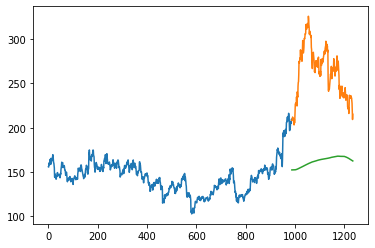

In [10]:
#plot
import matplotlib.pyplot as plt
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])